In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
from google.colab import files
import zipfile

# Upload the ZIP
uploaded = files.upload()

# Extract
zip_file = next(iter(uploaded))
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("flowers_dataset")


Saving flowers_recognition.zip to flowers_recognition.zip


In [4]:
train_path = "flowers_dataset/flowers"  # Change if needed

# Image preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
)

img_size = (128, 128)

train_data = datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)



Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,965 (28.20 MB)

 Trainable params: 7,392,965 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(train_data, validation_data=val_data, epochs=5)


Epoch 1/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 85s 783ms/step - accuracy: 0.7171 - loss: 0.7463 - val_accuracy: 0.6140 - val_loss: 1.0493
Epoch 2/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 143s 797ms/step - accuracy: 0.8522 - loss: 0.4518 - val_accuracy: 0.5884 - val_loss: 1.1600
Epoch 3/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 86s 785ms/step - accuracy: 0.9503 - loss: 0.1685 - val_accuracy: 0.5779 - val_loss: 1.5380
Epoch 4/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 87s 801ms/step - accuracy: 0.9897 - loss: 0.0704 - val_accuracy: 0.6023 - val_loss: 1.5991
Epoch 5/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 90s 830ms/step - accuracy: 0.9945 - loss: 0.0304 - val_accuracy: 0.5965 - val_loss: 1.7978


In [8]:
loss, accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {accuracy:.2f}")


27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 227ms/step - accuracy: 0.6312 - loss: 1.6748
Validation Accuracy: 0.60


Saving 8223968_6b51555d2f_n.jpg to 8223968_6b51555d2f_n.jpg


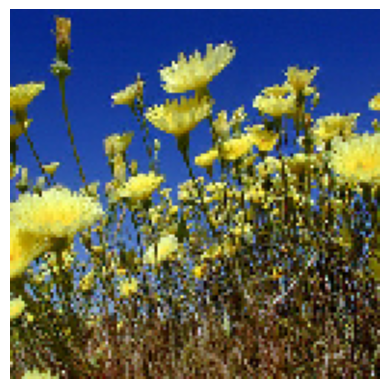

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Predicted Class: dandelion


In [9]:
from tensorflow.keras.preprocessing import image

# Upload a test image
test_img = files.upload()

# Load image
img_path = next(iter(test_img))
img = image.load_img(img_path, target_size=img_size)
plt.imshow(img)
plt.axis('off')
plt.show()

# Preprocess and predict
img_array = image.img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
pred_class = np.argmax(pred)
class_names = list(train_data.class_indices.keys())

print("Predicted Class:", class_names[pred_class])
